In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

HP = [h1X + h2Y + h3, h4X + h5Y + h6, h7X + h8Y + h9 ]

#### Equations : p x HP = 0

y(h7X + h8Y + h9) - s(h4X + h5Y + h6) = 0

s(h1X + h2Y + h3) - x(h7X + h8Y + h9 ) = 0

x(h4X + h5Y + h6) - y(h1X + h2Y + h3) = 0


### Rewriting equations using (u,v)

v(h7X + h8Y + h9) - (h4X + h5Y + h6) = 0

(h1X + h2Y + h3) - u(h7X + h8Y + h9 ) = 0

u(h4X + h5Y + h6) - v(h1X + h2Y + h3) = 0

### Showing that 3rd equation is linear combination of first 2

v(h7X + h8Y + h9) - (h4X + h5Y + h6) = 0 * u

                    +
                    
(h1X + h2Y + h3) - u(h7X + h8Y + h9 ) = 0 *  -v 

summing the 2 equations 

uv(h7X + h8Y + h9 - h7X - h8Y - h9) + (h4X + h5Y + h6)u +  (h1X + h2Y + h3)(-v) = 0, some terms cancel out and we get

(h4X + h5Y + h6)u +  (h1X + h2Y + h3)(-v) = 0 , which is equvalent to the third equation
                    
           

In [2]:
## defining world coordinates
X = np.array([100,500,500,100])
Y= np.array([100,100,300,300])

In [3]:
#defining extracted points
u = np.array([129.6,169.5,183.7,142.9])
v= np.array([216.5, 218.9,86.4,91.1])

In [4]:
img = plt.imread('license.jpg')

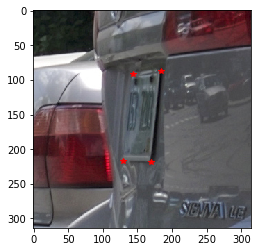

In [5]:
## showing image of licence plate
plt.imshow(img);
## overlaying selected points on plot
plt.plot(u,v,'r*')

In [6]:
A = np.array([[0,0,0,-1,-1,-1,v[0],v[0],v[0]],[1,1,1,0,0,0,-u[0],-u[0],-u[0]],
             [0,0,0,-1,-1,-1,v[1],v[1],v[1]],[1,1,1,0,0,0,-u[1],-u[1],-u[1]],
             [0,0,0,-1,-1,-1,v[2],v[2],v[2]],[1,1,1,0,0,0,-u[2],-u[2],-u[2]],
             [0,0,0,-1,-1,-1,v[3],v[3],v[3]],[1,1,1,0,0,0,-u[3],-u[3],-u[3]],
             [1,1,1,1,1,1,1,1,1]])
y = np.array([0,0,0,0,0,0,0,0,1])

A

array([[   0. ,    0. ,    0. ,   -1. ,   -1. ,   -1. ,  216.5,  216.5,
         216.5],
       [   1. ,    1. ,    1. ,    0. ,    0. ,    0. , -129.6, -129.6,
        -129.6],
       [   0. ,    0. ,    0. ,   -1. ,   -1. ,   -1. ,  218.9,  218.9,
         218.9],
       [   1. ,    1. ,    1. ,    0. ,    0. ,    0. , -169.5, -169.5,
        -169.5],
       [   0. ,    0. ,    0. ,   -1. ,   -1. ,   -1. ,   86.4,   86.4,
          86.4],
       [   1. ,    1. ,    1. ,    0. ,    0. ,    0. , -183.7, -183.7,
        -183.7],
       [   0. ,    0. ,    0. ,   -1. ,   -1. ,   -1. ,   91.1,   91.1,
          91.1],
       [   1. ,    1. ,    1. ,    0. ,    0. ,    0. , -142.9, -142.9,
        -142.9],
       [   1. ,    1. ,    1. ,    1. ,    1. ,    1. ,    1. ,    1. ,
           1. ]])

In [7]:
eig_vals, eig_vecs = np.linalg.eig(A)

In [8]:
eig_vecs[:2,:2]

array([[-0.46145526+0.j,  0.52527701+0.j],
       [ 0.29280709+0.j, -0.22212848+0.j]])

In [9]:
eps = np.diag(eig_vals)


In [10]:
sigs1 =np.matmul(eig_vecs.T , eig_vecs)
sigs2 =np.matmul(eig_vecs , eig_vecs.T)

invAA = np.linalg.inv(np.matmul(np.matmul(sigs1, np.matmul(eps,eps)),sigs2))

In [11]:
params = np.dot(invAA,np.dot(A.T,y))
params

array([ 6.79080727e+11-2.00914672e+11j,  1.69498283e+13+1.08124112e+11j,
        4.30031283e+12-1.09830086e+11j, -9.10792484e+12-5.75929970e+11j,
       -2.68959775e+13-2.03718894e+11j, -4.28058705e+12+1.89489835e+11j,
       -1.14694887e+13+1.57914589e+12j, -3.15405207e+13+7.65156763e+11j,
        5.14983202e+13+2.41390593e+12j])

In [12]:
H = params.reshape(3,3)
H

array([[ 6.79080727e+11-2.00914672e+11j,  1.69498283e+13+1.08124112e+11j,
         4.30031283e+12-1.09830086e+11j],
       [-9.10792484e+12-5.75929970e+11j, -2.68959775e+13-2.03718894e+11j,
        -4.28058705e+12+1.89489835e+11j],
       [-1.14694887e+13+1.57914589e+12j, -3.15405207e+13+7.65156763e+11j,
         5.14983202e+13+2.41390593e+12j]])

In [23]:
import cv2 # you will need to install the opencv library: pip3 install opencv-python
im = cv2.imread('license.jpg')
im_warp = cv2.warpPerspective(im, H, (2*im.shape[1],im.shape[0]))
plt.imshow(im_warp) 
plt.gca().invert_yaxis()
plt.show() 

TypeError: Expected Ptr<cv::UMat> for argument '%s'